# Exercise 1 - Linear Regression

In [29]:
import pandas as pd # for data structuring and data analysis tools
import numpy as np # # Scientific and vector computation for python
import matplotlib.pyplot as plt #2-d plotting
import statistics as stat
import sympy
from mpl_toolkits.mplot3d import axes3d # 3 d plots
import seaborn as sns # statistical data visualisation
from sympy.abc import theta

import os # used for manipulating directory paths


### Warm Up Exercise

In [30]:
I_num = 5
def warmUpExercise(I_num):
    Ident = np.identity(I_num)
    return(Ident)

Ident = warmUpExercise(I_num)
# print('Identity Matrix %d x %d'%(I_num, I_num))
print('Identy Maxtric of %d x %d:'%(I_num, I_num))

print(Ident)


Identy Maxtric of 5 x 5:
[[ 1.  0.  0.  0.  0.]
 [ 0.  1.  0.  0.  0.]
 [ 0.  0.  1.  0.  0.]
 [ 0.  0.  0.  1.  0.]
 [ 0.  0.  0.  0.  1.]]


### Loading Data

Number of training examples (m): 97
Number of features (n): 2


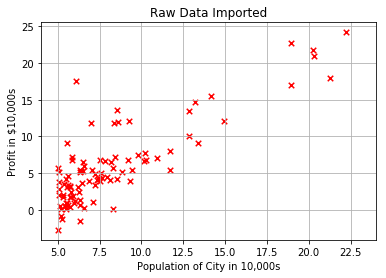

In [38]:
data = np.loadtxt('ex1data1.txt', delimiter = ',') #imports 96 x 2 array

#Add a column of ones to the data matrix that allows us to treat the intercept parameter as a feature.
X = np.c_[np.ones(len(data)),data[:,0]] 

y = np.c_[data[:,1]] # set y data to the second imported column
m, n = X.shape

#print('Number of features (n): %.0f'%(n))
print('Number of training examples (m): %.0f'%(m))
print('Number of features (n): %.0f'%(n))

#plot th raw data
%matplotlib inline
plt.figure()
plt.scatter(X[:,1], y, s = 30, c='r', marker = 'x', linewidths = 1)
plt.xlim(4,24)
plt.xlabel('Population of City in 10,000s')
plt.ylabel('Profit in $10,000s');
plt.title('Raw Data Imported')
plt.grid(True)


### Linear Regression with one Variable (Gradient Descent)

### Initialisation of Gradient Descent

In [32]:
#Inialize each of the two model parameters to zero.
theta_gd=[[0],[0]]   

# computre the cost function for a given
def computeCost(X, y, theta_gd):
    J = 0
    hypoth = X.dot(theta_gd) # determin the hypothesis
    J = 1 / (2 * m) * np.sum(np.square(hypoth - y)) # determine the cost function
    
    return(J) # return the cost function



In [33]:
J = computeCost(X, y, theta_gd) # run the cos function
print('The initial Parameters \n\t%s_1 = 0 \n\t%s_0 = 0 \n\tCost: %.3f'%(sympy.pretty(theta), sympy.pretty(theta),J))

The initial Parameters 
	θ_1 = 0 
	θ_0 = 0 
	Cost: 32.073


#### Implemet Gradient descent 


The parameter values for minimised cost function:
	θ_0: -3.788069
	θ_1: 1.182213


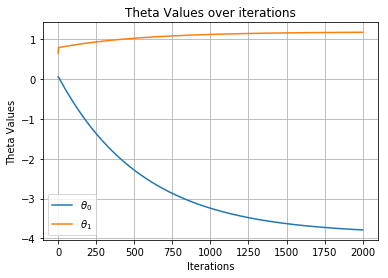

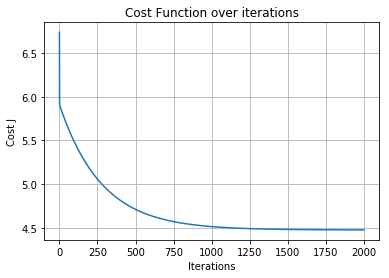

In [36]:
alpha = 0.01 #define the learning rate 
num_iters = 2000 # define the number of iterations of gradient descent
x_scale = np.arange(num_iters)

def gradientDescent(X, y, theta_gd, alpha, num_iters):
    for iter in np.arange(num_iters): #gradient descent iteration loop
        
        hypoth = X.dot(theta_gd) # determine the hypothesis for the current value of thetas
        dJ_theta_gd  = (1/m) * (X.T.dot(hypoth - y)) # Determine derivative of cost function
        theta_gd = theta_gd - alpha * dJ_theta_gd #calculate new values of theta
        
        # store calculated values of theta  
        theta_gd_history[iter][0] = theta_gd[0] 
        theta_gd_history[iter][1] = theta_gd[1]
        
        J_history[iter] = computeCost(X, y, theta_gd) #calclate the cost fucntion
        
    return(theta_gd, J_history, theta_gd_history) # return final theta and the list of cost function results

# run gradient descent to return final theta for minimum cost funtiona as well as all the cost function values 
#calculated (for each iteration)
theta_gd, J_history, theta_gd_history = gradientDescent(X, y, theta_gd, alpha, num_iters) 
print('\nThe parameter values for minimised cost function:')
print('\t%s_0: %f' %(sympy.pretty(theta),theta_gd[0]))  
print('\t%s_1: %f' %(sympy.pretty(theta), theta_gd[1]))  

# plot theta values as a function of iterations of gradient descent
%matplotlib inline
plt.figure()
plt.plot(x_scale, theta_gd_history)
plt.ylabel('Theta Values')
plt.xlabel('Iterations');
plt.title('Theta Values over iterations')
plt.grid(True)
plt.legend([r'$\theta_0$', r'$\theta_1$'])

# plot cost function histtory as a function of iterations of gradient descent
plt.figure()
plt.plot(x_scale, J_history)
plt.ylabel('Cost J')
plt.xlabel('Iterations');
plt.title('Cost Function over iterations')
plt.grid(True)

#### Compare Gradient Descent and sklearn

In [23]:

#detertine the y values according to the theta values from gradient descent
y_gd = X.dot(theta_gd) 
#determine the r^2 value
from sklearn.metrics import r2_score 
r2_gd = r2_score(y, y_gd) 

# determine the fit using linear regression classifier from sklearn
from sklearn.linear_model import LinearRegression # data classification, regeression, clustering etc
lr_regr = LinearRegression()
lr_regr.fit(X[:,1].reshape(-1,1), y.ravel())
theta_lr = np.zeros(2)
theta_lr[0] = lr_regr.intercept_
theta_lr[1] = lr_regr.coef_
y_lr = X.dot(theta_lr)
r2_lr = r2_score(y, y_lr) 

print('Goodness of fit for Gradient Descent r^2: %.3f'%(r2_gd))
print('Goodness of fit for Sk.learn leanear model r^2: %.3f'%(r2_lr))


Goodness of fit for Gradient Descent r^2: 0.702
Goodness of fit for Sk.learn leanear model r^2: 0.702


### Profit Prediction

In [83]:
# Predct profit for a city with population of 35000 and 70000
print('Predict profit for a city with population of:') 
print('GRADIENT DESCENT:')
print('\tPopulation of %.0f : $%.0f' %(35000, theta_gd.T.dot([1, 3.5]) * 10000))
print('\tPopulation of %.0f : $%.0f' %(70000,theta_gd.T.dot([1, 7]) * 10000))
print('SKLEARN:')
print('\tPopulation of %.0f : $%.0f' %(35000, theta_lr.T.dot([1, 3.5]) * 10000))
print('\tPopulation of %.0f : $%.0f' %(70000,theta_lr.T.dot([1, 7]) * 10000))

Predict profit for a city with population of:
GRADIENT DESCENT:
	Population of 35000 : $3497
	Population of 70000 : $44874
SKLEARN:
	Population of 35000 : $2798
	Population of 70000 : $44555


#### Summary of results

-----------------------------------------------------------------
			FITING RESULTS GRADIENT DESCENT
-----------------------------------------------------------------

Fitting: GRADIENT DESCENT
Learning rate (alpha): 0.01
Number of iterations: 2000
Fitting parameters:
	Intercept θ_0: -3.788
	Slope θ_1: 1.182
Goodness of fit r^2: 0.702
PREDICTIONS:
	Population of 35000 : $3497
	Population of 70000 : $44874
-----------------------------------------------------------------
			FITING RESULTS SKLEARN
-----------------------------------------------------------------

Fitting: Linear Regression SKLEARN
Fitting parameters:
	Intercept θ_0: -3.896
	Slope θ_1: 1.193
Goodness of fit r^2: 0.702
PREDICTIONS:
	Population of 35000 : $2798
	Population of 70000 : $44555


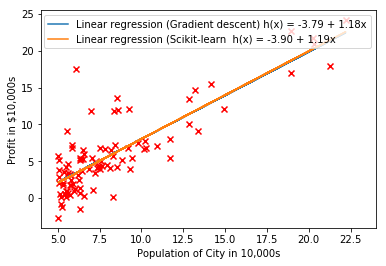

In [40]:
print('-----------------------------------------------------------------')
print('\t\t\tFITING RESULTS GRADIENT DESCENT')
print('-----------------------------------------------------------------')
print('\nFitting: GRADIENT DESCENT')
print('Learning rate (alpha): %.2f'%(alpha))
print('Number of iterations: %.0f'%(num_iters))
print('Fitting parameters:')
print('\tIntercept %s_0: %.3f'%(sympy.pretty(theta), theta_gd[0]))
print('\tSlope %s_1: %.3f'%(sympy.pretty(theta), theta_gd[1]))
print('Goodness of fit r^2: %.3f'%(r2_gd))
print('PREDICTIONS:')
print('\tPopulation of %.0f : $%.0f' %(35000, theta_gd.T.dot([1, 3.5]) * 10000))
print('\tPopulation of %.0f : $%.0f' %(70000,theta_gd.T.dot([1, 7]) * 10000))

print('-----------------------------------------------------------------')
print('\t\t\tFITING RESULTS SKLEARN')
print('-----------------------------------------------------------------')
print('\nFitting: Linear Regression SKLEARN')
print('Fitting parameters:')
print('\tIntercept %s_0: %.3f'%(sympy.pretty(theta), theta_lr[0]))
print('\tSlope %s_1: %.3f'%(sympy.pretty(theta), theta_lr[1]))
print('Goodness of fit r^2: %.3f'%(r2_lr))
print('PREDICTIONS:')
print('\tPopulation of %.0f : $%.0f' %(35000, theta_lr.T.dot([1, 3.5]) * 10000))
print('\tPopulation of %.0f : $%.0f' %(70000,theta_lr.T.dot([1, 7]) * 10000))

# Plot gradient descent & Scikit-learn Linear regression 
plt.figure()
plt.scatter(X[:,1], y, c = 'r', marker = 'x', linewidths = 2)
plt.plot(X[:,1], y_gd, label = 'Linear regression (Gradient descent) h(x) = %.2f + %.2fx'%(theta_gd[0],theta_gd[1])) 
plt.plot(X[:,1],y_lr , label = 'Linear regression (Scikit-learn  h(x) = %.2f + %.2fx'%(theta_lr[0],theta_lr[1]))
plt.xlim(4,24)
plt.xlabel('Population of City in 10,000s')
plt.ylabel('Profit in $10,000s')
plt.legend()


### 3-d Cost Function

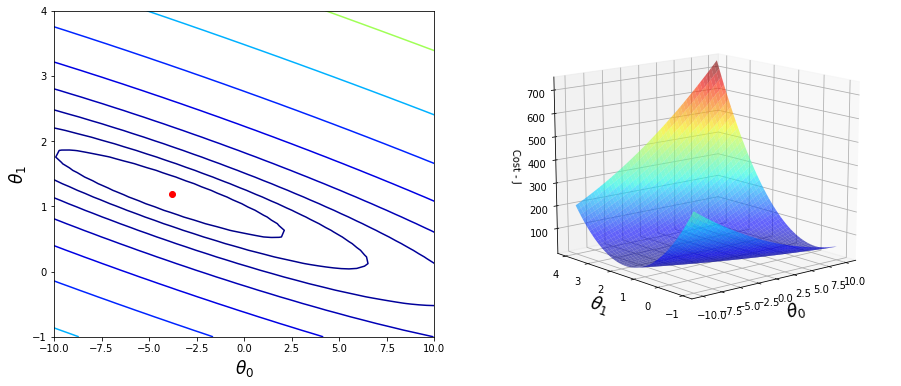

In [41]:
# Create grid coordinates for plotting
theta0_axis = np.linspace(-10, 10, 50) # create axis for theta0 grid
theta1_axis = np.linspace(-1, 4, 50)# create axis for theta1 grid

theta0_grid, theta1_grid = np.meshgrid(theta0_axis, theta1_axis, indexing='xy') # create mesh grid of theta0 and theta1
Cost_3d = np.zeros((theta0_axis.size,theta1_axis.size)) # creats grid of zeros from cost values

# Calculate Cost-values based on grid of coefficients
for (i,j),v in np.ndenumerate(Cost_3d): #loop through the Cost grid ... double for loop
    theta_3d = [[theta0_grid[i,j]], [theta1_grid[i,j]]] #create current value of theta
    Cost_3d[i,j] = computeCost(X, y, theta_3d) #create cost for the give values of theta

fig = plt.figure(figsize = (15,6))
ax1 = fig.add_subplot(121)
ax2 = fig.add_subplot(122, projection = '3d')

# Left plot
CS = ax1.contour(theta0_grid, theta1_grid, Cost_3d, np.logspace(-2, 3, 20), cmap = plt.cm.jet)
ax1.scatter(theta_gd[0],theta_gd[1], c = 'r') # plot the final theta values

# Right plot
ax2.plot_surface(theta0_grid, theta1_grid, Cost_3d, rstride = 1, cstride = 1, alpha = 0.6, cmap = plt.cm.jet)
ax2.set_zlabel('Cost - J')
ax2.set_zlim(Cost_3d.min(), Cost_3d.max())
ax2.view_init(elev = 15, azim = 230)

# settings common to both plots
for ax in fig.axes:
    ax.set_xlabel(r'$\theta_0$', fontsize=17)
    ax.set_ylabel(r'$\theta_1$', fontsize=17)


the purpose of these graphs is to show that J($\theta$) varies with changes in $\theta_0$ and $\theta_1$. the cost function is bowl-shaped and has a global minimum. 

## Multi Variable Linear Regression

Number of training examples (m): 47
Number of features(n): 2
First 10 examples from the dataset:
[[  2.10400000e+03   1.60000000e+03   2.40000000e+03   1.41600000e+03
    3.00000000e+03   1.98500000e+03   1.53400000e+03   1.42700000e+03
    1.38000000e+03   1.49400000e+03]
 [  3.00000000e+00   3.00000000e+00   3.00000000e+00   2.00000000e+00
    4.00000000e+00   4.00000000e+00   3.00000000e+00   3.00000000e+00
    3.00000000e+00   3.00000000e+00]]
[ 3.  3.  3.  2.  4.  4.  3.  3.  3.  3.  4.  3.  3.  5.  3.  4.  2.  3.
  4.  4.  3.  2.  3.  4.  3.  3.  3.  3.  3.  3.  2.  1.  4.  3.  4.  3.
  3.  4.  4.  4.  2.  3.  4.  3.  2.  4.  3.]


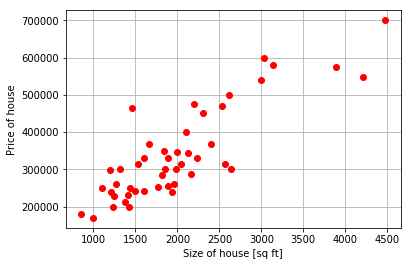

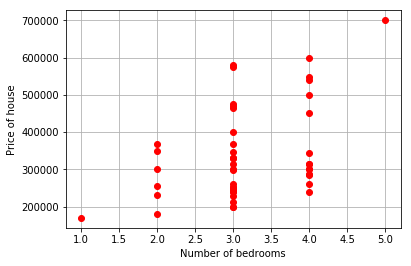

In [42]:

data = np.loadtxt('ex1data2.txt', delimiter=',')
X2 = data[:, :2]
y2 = data[:, 2]
m,n = X2.shape

print('Number of training examples (m): %.0f'%(m))
print('Number of features(n): %.0f'%(n))
# Print out some data points
print('First 10 examples from the dataset:')
print(np.column_stack( (X2[:10]) ))

print(X2[:,1])
plt.figure()
plt.plot(X2[:,0], y2, 'o',color='r')
plt.xlabel(r'Size of house [sq ft]')
plt.ylabel(r'Price of house')
plt.grid(True)

plt.figure()
plt.plot(X2[:,1], y2, 'o',color='r')
plt.xlabel(r'Number of bedrooms')
plt.ylabel(r'Price of house')
plt.grid(True)

Before Normalisation:
	House Prices:
		Mean: $2000.68
		Max: $4478.00
		Min: $852.00
		Span: $3626.00
		Standard deviation: $786.20
		Variance:$618114.56

	House Size (sq-ft):
		Mean: $3.17
		Max: $5.00
		Min: $1.00
		Span: $4.00
		Standard deviation: $0.75
		Variance:$0.57

Normalisation Parameters:
	mu: 2000.68
	sigma: 786.20


After Normalisation:
	House Prices:
		Mean: $-0.00
		Max: $3.15
		Min: $-1.46
		Span: $4.61
		Standard deviation: $1.00
		Variance:$1.00
	
House Size (sq-ft):
		Mean: $0.00
		Max: $2.43
		Min: $-2.88
		Span: $5.31
		Standard deviation: $1.00
		Variance:$1.00


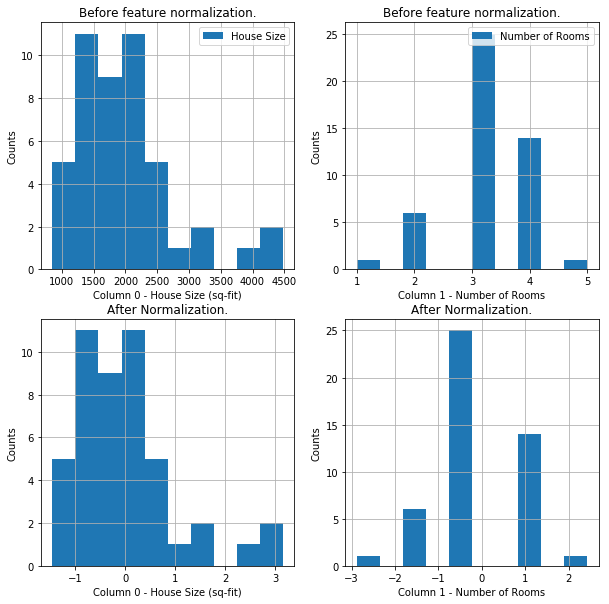

In [43]:

print('Before Normalisation:')

means = np.mean(X2, axis = 0)
mins = np.min(X2, axis = 0)
maxs = np.max(X2, axis = 0)
stdvs = np.std(X2, axis = 0)
variances =  np.var(X2, axis = 0)

print('\tHouse Prices:')
print('\t\tMean: $%.2f'%(means[0]))
print('\t\tMax: $%.2f'%(maxs[0]))
print('\t\tMin: $%.2f'%(mins[0]))
print('\t\tSpan: $%.2f'%(maxs[0] - mins[0]))
print('\t\tStandard deviation: $%.2f'%(stdvs[0]))
print('\t\tVariance:$%.2f'%(variances[0]))

print('\n\tHouse Size (sq-ft):')
print('\t\tMean: $%.2f'%(means[1]))
print('\t\tMax: $%.2f'%(maxs[1]))
print('\t\tMin: $%.2f'%(mins[1]))
print('\t\tSpan: $%.2f'%(maxs[1] - mins[1]))
print('\t\tStandard deviation: $%.2f'%(stdvs[1]))
print('\t\tVariance:$%.2f'%(variances[1]))


# Function to normalise features
def featureNormalize(X):
    mu = np.mean(X[:, :1])
    sigma = np.std(X[:, :1])

    mu1 = np.mean(X[:, 1:])
    sigma1 = np.std(X[:, 1:])

    x_ = (X[:, :1] - mu) / sigma
    x1_ = (X[:, 1:] - mu1) / sigma1

    X_norm = np.append(x_, x1_, axis = 1)
    return(X_norm, mu, sigma)
    
X_norm, mu, sigma = featureNormalize(X2)

print('\nNormalisation Parameters:')
print('\tmu: %.2f'%(mu))
print('\tsigma: %.2f'%(sigma))

print('\n\nAfter Normalisation:')
means_norm = np.mean(X_norm, axis = 0)
mins_norm = np.min(X_norm, axis = 0)
maxs_norm = np.max(X_norm, axis = 0)
stdvs_norm = np.std(X_norm, axis = 0)
variances_norm =  np.var(X_norm, axis = 0)

print('\tHouse Prices:')
print('\t\tMean: $%.2f'%(means_norm[0]))
print('\t\tMax: $%.2f'%(maxs_norm[0]))
print('\t\tMin: $%.2f'%(mins_norm[0]))
print('\t\tSpan: $%.2f'%(maxs_norm[0] - mins_norm[0]))
print('\t\tStandard deviation: $%.2f'%(stdvs_norm[0]))
print('\t\tVariance:$%.2f'%(variances_norm[0]))

print('\t\nHouse Size (sq-ft):')
print('\t\tMean: $%.2f'%(means_norm[1]))
print('\t\tMax: $%.2f'%(maxs_norm[1]))
print('\t\tMin: $%.2f'%(mins_norm[1]))
print('\t\tSpan: $%.2f'%(maxs_norm[1] - mins_norm[1]))
print('\t\tStandard deviation: $%.2f'%(stdvs_norm[1]))
print('\t\tVariance:$%.2f'%(variances_norm[1]))


# plot with various axes scales
fig = plt.figure(figsize = (10, 10)) 
plt.subplot(221)
plt.grid(True)
plt.hist(X2[:,0],label = 'House Size')
plt.title('Before feature normalization.')
plt.xlabel('Column 0 - House Size (sq-fit)')
plt.ylabel('Counts')
dummy = plt.legend()

plt.subplot(222)
plt.grid(True)
plt.hist(X2[:,1],label = 'Number of Rooms')
plt.title('Before feature normalization.')
plt.xlabel('Column 1 - Number of Rooms')
plt.ylabel('Counts')
dummy = plt.legend()

plt.subplot(223)
plt.grid(True)
plt.hist(X_norm[:,0])
plt.title('After Normalization.')
plt.xlabel('Column 0 - House Size (sq-fit)')
plt.ylabel('Counts')

# logit
plt.subplot(224)
plt.grid(True)
plt.hist(X_norm[:,1])
plt.title('After Normalization.')
plt.xlabel('Column 1 - Number of Rooms')
plt.ylabel('Counts')

# Add intercept term to X
X_norm = np.concatenate((np.ones((m, 1)), X_norm), axis = 1)
n = len(X_norm[0])


### Gradient descent for multiple variables

In [46]:

def computeCostMulti(X, y, theta_gd):
    m = y.size
    J = 0

    h = np.dot(X, theta_gd)
    J = 1 / (2 * m) * np.sum(np.square(h - y))
    
    return J

def gradientDescentMulti(X, y, theta_gd, alpha, num_iters):
    theta_gd_history = np.zeros((num_iters,3)) 
    
    # Initialize some useful values
    J_history = []
    m = y.size  # number of training examples

    for i in range(num_iters):

        h = np.dot(X_norm, theta_gd) # calculate hypothesis
        theta_gd = theta_gd - ((alpha / m) * (np.dot(X.T, (h - y))))
        
        # keep track of how the parameters vary
        theta_gd_history[i][0] = theta_gd[0] 
        theta_gd_history[i][1] = theta_gd[1] 
        theta_gd_history[i][2] = theta_gd[2] 
        # Save the cost J in every iteration
        J_history.append(computeCostMulti(X, y, theta_gd))
        

    return theta_gd, theta_gd_history, J_history

# Gradient descent parameters
alpha = 0.01
num_iters = 400
# Init Theta and Run Gradient Descent 
theta_gd = np.zeros(n)
theta_gd, theta_gd_history, J_history = gradientDescentMulti(X_norm, y2, theta_gd, alpha, num_iters)

### Summary of Results

-----------------------------------
		FITING RESULTS GRADIENT DESCENT
-----------------------------------

Fitting: Gradient Descent
Learning rate (alpha): 0.01
Number of iterations: 400
Fitting parameters:
	θ_0: 334302.064
	θ_1: 99411.449
	θ_2: 3267.013
Goodness of fit r^2: 0.725


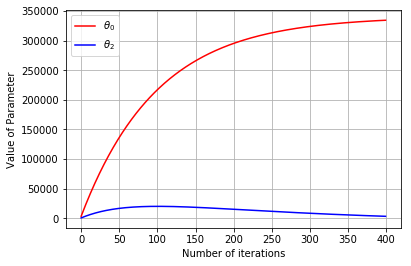

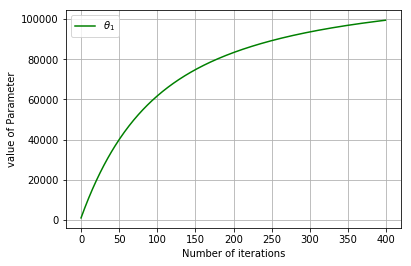

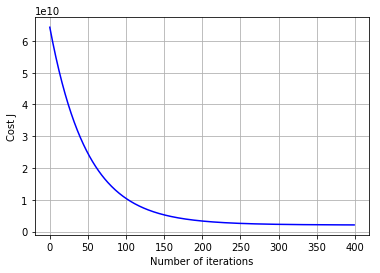

In [47]:

# Plot the convergence graph
plt.figure()
plt.plot(theta_gd_history[:,0], '-r')
plt.plot(theta_gd_history[:,2], '-b')
plt.xlabel('Number of iterations')
plt.ylabel('Value of Parameter')
plt.grid(True)
plt.legend([r'$\theta_0$', r'$\theta_2$'])

# Plot the convergence graph
plt.figure()
plt.plot(theta_gd_history[:,1], '-g')
plt.xlabel('Number of iterations')
plt.ylabel('value of Parameter')
plt.legend([r'$\theta_1$'])
plt.grid(True)

plt.figure()
plt.plot(J_history, '-b')
plt.xlabel('Number of iterations')
plt.ylabel('Cost J')
plt.grid(True)

#detertine the y values according to the theta values from gradient descent
y2_gd = X_norm.dot(theta_gd) 
#determine the r^2 value
from sklearn.metrics import r2_score 
r2_gd = r2_score(y2, y2_gd) 



print('-----------------------------------')
print('\t\tFITING RESULTS GRADIENT DESCENT')
print('-----------------------------------')
print('\nFitting: Gradient Descent')
print('Learning rate (alpha): %.2f'%(alpha))
print('Number of iterations: %.0f'%(num_iters))
print('Fitting parameters:')
print('\t%s_0: %.3f'%(sympy.pretty(theta), theta_gd[0]))
print('\t%s_1: %.3f'%(sympy.pretty(theta), theta_gd[1]))
print('\t%s_2: %.3f'%(sympy.pretty(theta), theta_gd[2]))
print('Goodness of fit r^2: %.3f'%(r2_gd))


#### Cost estimation

A 1650 sq-ft, 3 bedroom house will cost $281658.97
Plots showing the  1650 sq-ft, 3 bedroom house (in blue)


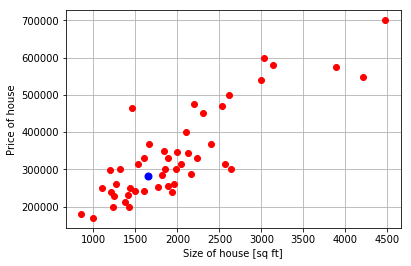

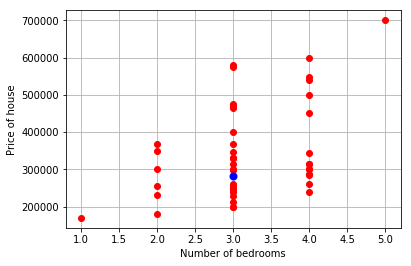

In [48]:

# Estimate the price of a 1650 sq-ft, 3 br house
vals = (np.array([1650, 3]) - mu) / sigma
vals = np.hstack((np.array([1]), vals))

predict1 = np.dot(theta_gd, vals)
print('A 1650 sq-ft, 3 bedroom house will cost $%6.2f' %(predict1))

# plot the data and prediction
print('Plots showing the  1650 sq-ft, 3 bedroom house (in blue)')


plt.figure()
plt.plot(X2[:,0], y2, 'o',color = 'r')
plt.plot(1650, predict1, 'o', color = 'b', mew = 2)
plt.xlabel(r'Size of house [sq ft]')
plt.ylabel(r'Price of house')
plt.grid(True)

plt.figure()
plt.plot(X2[:,1], y2, 'o',color = 'r')
plt.plot(3, predict1, 'o', color = 'b', mew = 2)
plt.xlabel(r'Number of bedrooms')
plt.ylabel(r'Price of house')
plt.grid(True)

### Learnign rates

Cost function for various learning rates:


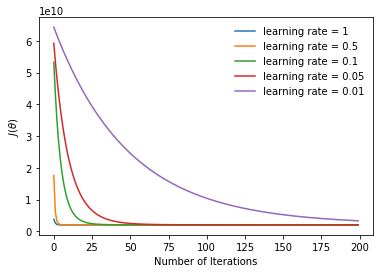

In [49]:
alphas = [1, 0.5, 0.1, 0.05, 0.01]
theta_gd_a = np.zeros(n)
print('Cost function for various learning rates:')
for a in alphas:
    theta_gd_a = np.zeros(n)
    theta_gd_a, theta_gd_history, J_history = gradientDescentMulti(X_norm, y2, theta_gd_a, a, 200)
    J_history
    plt.plot(J_history, label = 'learning rate = {0}'.format(a))

    
plt.ylabel(r'$J(\theta)$')
plt.xlabel(r'Number of Iterations')
plt.legend(loc = 'best', frameon = False)



In [50]:
def normalEqn(X, y):
    inv_term = np.linalg.inv(np.dot(X.T, X))
    theta = np.dot(inv_term, np.dot(X.T, y))
    
    return theta

In [51]:
# re-compute X with out normalization
X2 = np.hstack((np.ones((X2.shape[0],1)), X2))

# get solution with normal equation
theta_norm = normalEqn(X2, y2)


print('/nFitting parameters:')
print('\t%s_0: %.3f'%(sympy.pretty(theta), theta_norm[0]))
print('\t%s_1: %.3f'%(sympy.pretty(theta), theta_norm[1]))
print('\t%s_2: %.3f\n'%(sympy.pretty(theta), theta_norm[2]))

# Estimate the price of a 1650 sq-ft, 3 br house
vals = np.array([1650, 3])
vals = np.hstack((np.array([1]), vals))

# this is the same answer as above if run for more iterations
predict2 = np.dot(theta_norm, vals)
print('A 1650 sq-ft 3 br house will cost $%6.2f' %(predict2))


/nFitting parameters:
	θ_0: 89597.910
	θ_1: 139.211
	θ_2: -8738.019

A 1650 sq-ft 3 br house will cost $293081.46


In [52]:
print('\n\nMethod: Gradient Descent')
print('\tCost: $%.2f'%(predict1))
print('Method: Normal Equation')
print('\tCost: $%.2f'%(predict2))



Method: Gradient Descent
	Cost: $281658.97
Method: Normal Equation
	Cost: $293081.46
